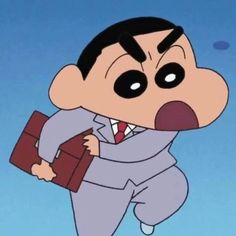

## 백엔드 개발자를 위한 MLOps

### 2.2 PyTorch 기본 실습

Tensor 조작 및 nn.Module 이해

In [ ]:
# colab install command
# !pip install torchviz

In [3]:
from torchviz import make_dot
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [4]:
x = torch.tensor([1.0, 2.0, 3.0], requires_grad=True)
y = torch.tensor([4.0, 5.0, 6.0], requires_grad=True)

# 덧셈
z = x + y
print(z)  # tensor([5, 7, 9])

tensor([5., 7., 9.], grad_fn=<AddBackward0>)


만약에 로컬 환경에서 실행한다면

$ brew install graphbiz

실행하여 make_dot 실행할 수 있도록 하기

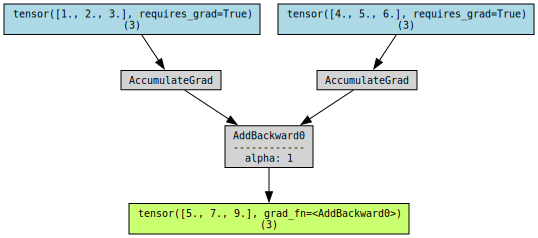

In [3]:
make_dot(z, params={x: x, y: y, z: z}, show_attrs=True, show_saved=True)

In [4]:
s = z.sum()

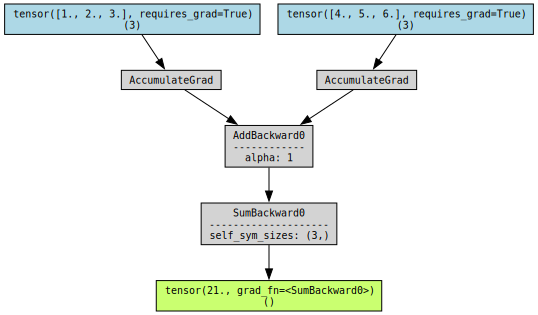

In [5]:
make_dot(s, params={x: x, y: y, z: z, s: s}, show_attrs=True, show_saved=True)

In [6]:
s.backward()

예시 1: 텐서 생성

In [7]:
# 0으로 채워진 텐서
x = torch.zeros(2, 3)
print(x)

# 1로 채워진 텐서
y = torch.ones(2, 3)
print(y)

# 특정 값을 기준으로 텐서 생성
z = torch.tensor([[1, 2], [3, 4]])
print(z)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[1, 2],
        [3, 4]])


예시 2: 텐서 타입 및 크기 확인

In [8]:
x = torch.rand(2, 3, 4)
print(x.dtype)    # torch.float32 (기본 데이터 타입)
print(x.size())   # torch.Size([2, 3, 4])

torch.float32
torch.Size([2, 3, 4])


In [9]:
x

tensor([[[0.5431, 0.3985, 0.4023, 0.9902],
         [0.5961, 0.2820, 0.9013, 0.4628],
         [0.4288, 0.8105, 0.7077, 0.7468]],

        [[0.8499, 0.9883, 0.6767, 0.0709],
         [0.4562, 0.4276, 0.7877, 0.6723],
         [0.2554, 0.2458, 0.1387, 0.9601]]])

예시 3: 텐서 변환 (reshape)

In [10]:
x = torch.rand(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # -1은 차원을 추론하여 자동 계산한다는 의미

print(y.size())    # torch.Size([16])
print(z.size())    # torch.Size([2, 8])

torch.Size([16])
torch.Size([2, 8])


예시 4: 텐서 연결 (concatenation)

In [11]:
a = torch.tensor([[1, 2], [3, 4]])
b = torch.tensor([[5, 6]])
c = torch.cat([a, b], dim=0) # dim=0은 행을 기준으로 병합
print(c)
print(c.size())

tensor([[1, 2],
        [3, 4],
        [5, 6]])
torch.Size([3, 2])


5. 예시 5: 차원 추가 및 제거

In [12]:
x = torch.tensor([1, 2, 3, 4])
x1 = x.unsqueeze(0)    # 차원 추가
x2 = x1.squeeze(0)     # 차원 제거
print(x1)
print(x1.size())
print(x2)
print(x2.size())

tensor([[1, 2, 3, 4]])
torch.Size([1, 4])
tensor([1, 2, 3, 4])
torch.Size([4])


예시 6. 텐서 인덱싱 및 슬라이싱

In [13]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print(x)          # 텐서 원본
print(x[0, :])    # 첫 번째 행 전체
print(x[:, 1])    # 두 번째 열 전체
print(x[1:, 1:])  # 첫 번째 행 이후의 각 행의, 첫 번째 열 이후의 각 열

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
tensor([1, 2, 3])
tensor([2, 5, 8])
tensor([[5, 6],
        [8, 9]])


예시 7. 텐서 분리 (splitting)

In [14]:
x = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9], [10, 11, 12]])
a, b = torch.split(x, 2, dim=0)  # 행 기준으로, 2개씩 분리
print(x) # 텐서 원본
print(a)
print(b)

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor([[1, 2, 3],
        [4, 5, 6]])
tensor([[ 7,  8,  9],
        [10, 11, 12]])


예시 8: 텐서 전치 (transpose)

In [15]:
x = torch.tensor([[1, 2], [3, 4], [5, 6]])
print(x)
print(x.transpose(0, 1))  # 0번째와 1번째 차원을 전치

tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 3, 5],
        [2, 4, 6]])


## nn.Module

`nn.Module`은 PyTorch의 신경망 구성을 위한 레이어 혹은 모델을 위한 클래스

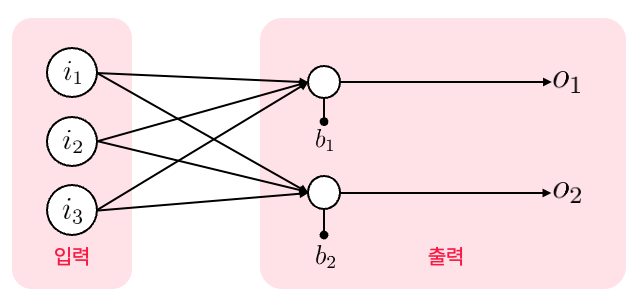

In [16]:
class LinearModule(nn.Module):
    def __init__(self, input_dim, output_dim):
        super().__init__()
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.fc(x)

In [17]:
model = LinearModule(3, 2)
x = torch.randn(10, 3)
output = model(x)
output

tensor([[ 0.9262,  0.2082],
        [ 0.9731, -0.1266],
        [ 0.0950, -0.2128],
        [ 0.0058, -0.6424],
        [ 0.2317, -0.3279],
        [ 0.7114, -0.1695],
        [ 0.2301, -0.3957],
        [ 0.4126, -0.0923],
        [-0.4135, -0.8156],
        [ 0.5607, -0.3183]], grad_fn=<AddmmBackward0>)

## 실습: XOR 예측 문제

XOR 게이트 입력 매개변수 A, B를 주었을 때 출력 Y(A⊕B)를 계산하는 모델을 학습 및 구성.
회로는 설계하는 방식이 아니라, input과 output을 주고, fully connected 모델의 가중치를 학습하면서 예측 모델을 만드는 것인 점을 알아두고 가자.

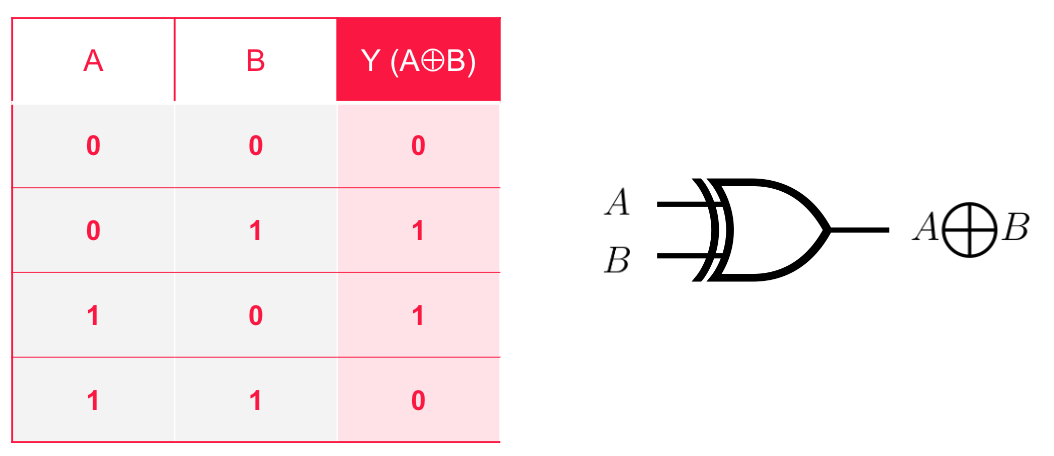

In [18]:
# XOR 연산을 위한 신경망 모델 정의
class XORModel(nn.Module):
    def __init__(self):
        super(XORModel, self).__init__()
        self.layer1 = nn.Linear(2, 2)  # 입력 2개, 출력 2개
        self.layer2 = nn.Linear(2, 1)  # 입력 2개, 출력 1개
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.sigmoid(self.layer1(x))
        x = self.sigmoid(self.layer2(x))
        return x

In [19]:
# 데이터 정의
x_data = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
y_data = torch.tensor([[0], [1], [1], [0]], dtype=torch.float32)

# 모델 초기화
model = XORModel()

# 손실 함수 및 최적화 알고리즘 정의
criterion = nn.BCELoss()  # Binary Cross-Entropy loss
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [20]:
# 모델 학습
losses = []
for epoch in range(100001):
    # Forward pass
    outputs = model(x_data)
    loss = criterion(outputs, y_data)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    losses.append(loss.item())

    if epoch % 1000 == 0:
        print(f'Epoch [{epoch}/10000], Loss: {loss.item():.4f}')

Epoch [0/10000], Loss: 0.7091
Epoch [1000/10000], Loss: 0.6932
Epoch [2000/10000], Loss: 0.6931
Epoch [3000/10000], Loss: 0.6931
Epoch [4000/10000], Loss: 0.6931
Epoch [5000/10000], Loss: 0.6931
Epoch [6000/10000], Loss: 0.6931
Epoch [7000/10000], Loss: 0.6931
Epoch [8000/10000], Loss: 0.6931
Epoch [9000/10000], Loss: 0.6930
Epoch [10000/10000], Loss: 0.6930
Epoch [11000/10000], Loss: 0.6930
Epoch [12000/10000], Loss: 0.6929
Epoch [13000/10000], Loss: 0.6927
Epoch [14000/10000], Loss: 0.6924
Epoch [15000/10000], Loss: 0.6918
Epoch [16000/10000], Loss: 0.6903
Epoch [17000/10000], Loss: 0.6854
Epoch [18000/10000], Loss: 0.6667
Epoch [19000/10000], Loss: 0.5997
Epoch [20000/10000], Loss: 0.2576
Epoch [21000/10000], Loss: 0.0937
Epoch [22000/10000], Loss: 0.0528
Epoch [23000/10000], Loss: 0.0359
Epoch [24000/10000], Loss: 0.0269
Epoch [25000/10000], Loss: 0.0214
Epoch [26000/10000], Loss: 0.0178
Epoch [27000/10000], Loss: 0.0151
Epoch [28000/10000], Loss: 0.0132
Epoch [29000/10000], Loss: 

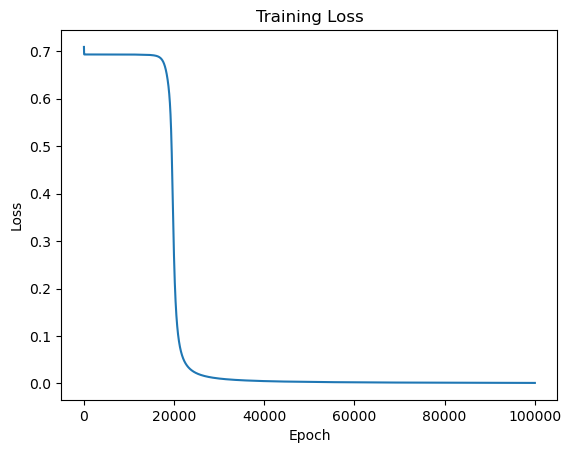

In [21]:
# Loss 시각화
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss')
plt.show()

In [22]:
# 모델 테스트
with torch.no_grad():
    test = torch.tensor([[0, 0], [0, 1], [1, 0], [1, 1]], dtype=torch.float32)
    predicted = model(test)
    print(predicted)

tensor([[0.0010],
        [0.9989],
        [0.9989],
        [0.0016]])


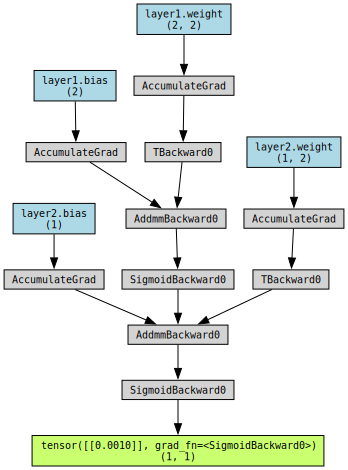

In [23]:
x = torch.randn(1, 2)
y = model(x)
make_dot(y, params={**dict(model.named_parameters()), y: y})